In [36]:
import torch
from torchvision import models, transforms
from PIL import Image
import numpy as np
# Load a pre-trained ResNet model
model = models.resnet50(pretrained=True)
model.eval()

# Define transformation for the input image
preprocess = transforms.Compose([
    transforms.Resize(256),
    transforms.CenterCrop(224),
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225]),
])

# Load and preprocess the image
image_path = 'socialmediaimages/em5.jpg'  # Replace with your image path
input_image = Image.open(image_path)
input_tensor = preprocess(input_image)
input_batch = input_tensor.unsqueeze(0)

# Run the model and get predictions
with torch.no_grad():
    output = model(input_batch)
    probabilities = torch.nn.functional.softmax(output[0], dim=0)

# Get top 5 predictions
_, indices = torch.topk(probabilities, 5)
for i in indices:
    print(f"{i.item()}: {probabilities[i].item() * 100:.2f}%")


399: 19.22%
916: 16.18%
834: 8.53%
841: 7.31%
501: 5.54%


In [11]:
import torch
from torchvision import models, transforms
from PIL import Image
import json

# Load a pre-trained ResNet model
model = models.resnet50(pretrained=True)
model.eval()

# Define transformation for the input image
preprocess = transforms.Compose([
    transforms.Resize(256),
    transforms.CenterCrop(224),
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225]),
])

# Load and preprocess the image
image_path = 'socialmediaimages/fd16.jpg'  # Replace with your image path
input_image = Image.open(image_path)
input_tensor = preprocess(input_image)
input_batch = input_tensor.unsqueeze(0)  # Add batch dimension

# Run the model and get predictions
with torch.no_grad():
    output = model(input_batch)
    probabilities = torch.nn.functional.softmax(output[0], dim=0)

# Load ImageNet class labels
with open("imagenet_classes.json") as f:  # Ensure the JSON file is in the same directory
    class_idx = json.load(f)

# Get top 5 predictions
_, indices = torch.topk(probabilities, 5)

# Print each prediction with class name and probability
for idx in indices:
    label = class_idx[str(idx.item())]
    score = probabilities[idx].item() * 100
    print(f"{idx.item()}: {label} ({score:.2f}%)")


916: ['n06359193', 'web_site'] (44.10%)
480: ['n02977058', 'cash_machine'] (22.19%)
782: ['n04152593', 'screen'] (3.44%)
851: ['n04404412', 'television'] (2.94%)
620: ['n03642806', 'laptop'] (2.70%)


In [10]:
import tensorflow as tf
import numpy as np

# Load the pre-trained DenseNet201 model
model = tf.keras.applications.DenseNet201(weights='imagenet')

# Load and preprocess the image
image_path = 'socialmediaimages/fd16.jpg'
img = tf.keras.preprocessing.image.load_img(image_path, target_size=(224, 224))
img_array = tf.keras.preprocessing.image.img_to_array(img)
img_array = np.expand_dims(img_array, axis=0)
img_array = tf.keras.applications.densenet.preprocess_input(img_array)

# Get predictions
predictions = model.predict(img_array)

# Decode predictions
decode_predictions = tf.keras.applications.densenet.decode_predictions(predictions, top=1)[0][0]

# Print the top prediction
imagenet_id, label, score = decode_predictions
print(f"Prediction: {label} ({score:.2f})")

1/1 ━━━━━━━━━━━━━━━━━━━━ 13s 13s/step
Prediction: cash_machine (0.59)


In [6]:
import tensorflow as tf
import numpy as np

# Dummy semantic segmentation result
# Assume the result is a (height, width, num_classes) array
# where each pixel has a one-hot encoded class
segmentation_result = np.random.randint(0, 2, (256, 256, 3))

# Calculate the percentage of each class in the segmentation
class_percentages = np.mean(segmentation_result, axis=(0, 1)) * 100

# Find the class with the maximum percentage
max_class_index = np.argmax(class_percentages)
max_class_percentage = class_percentages[max_class_index]

print(f"Class {max_class_index} has the maximum percentage: {max_class_percentage:.2f}%")


Class 0 has the maximum percentage: 50.42%


Linear Regression: MSE = 4127569.21, R^2 = -0.56
Polynomial Regression: MSE = 4019464.31, R^2 = -0.52
Ridge Regression: MSE = 2886188.09, R^2 = -0.09
Lasso Regression: MSE = 4125781.94, R^2 = -0.56
Elastic Net: MSE = 2778119.35, R^2 = -0.05
Decision Tree: MSE = 7090142.05, R^2 = -1.69
Random Forest: MSE = 4775736.71, R^2 = -0.81
SVR: MSE = 2901835.27, R^2 = -0.10


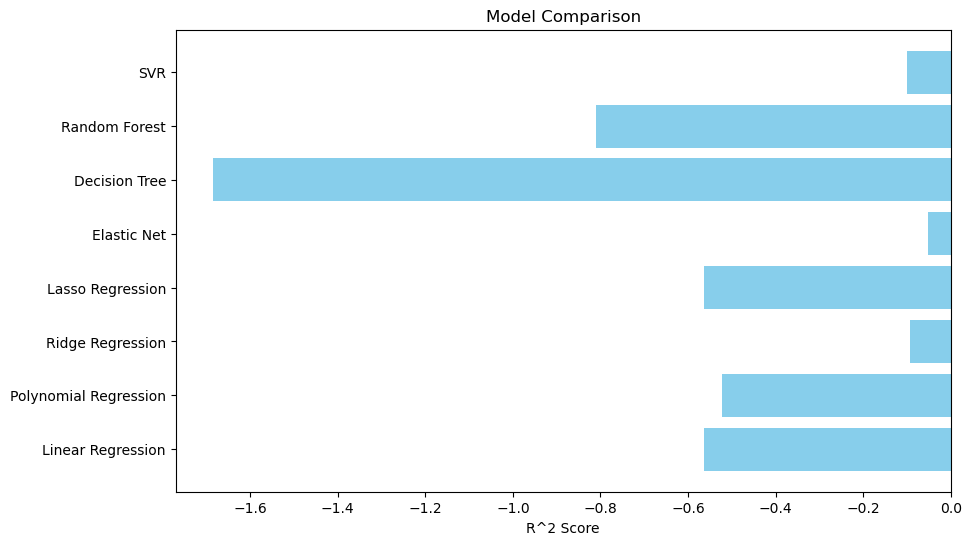

In [9]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt

# Load the dataset
file_path = 'C:/Users/Medhavi/photodataset.xlsx'
df = pd.read_excel(file_path)


# Define dependent and independent variables
X = df[['semantic_seg_perc', 'max_fine_recog', 'similarity']]
y = df['total_engage']  # Assuming this is the column name

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=42)

# Function to evaluate models
def evaluate_model(model):
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    return mse, r2

# Linear Regression
lr = LinearRegression()
mse_lr, r2_lr = evaluate_model(lr)

# Polynomial Regression (degree=2)
poly = make_pipeline(PolynomialFeatures(degree=2), LinearRegression())
mse_poly, r2_poly = evaluate_model(poly)

# Ridge Regression
ridge = Ridge(alpha=1.0)
mse_ridge, r2_ridge = evaluate_model(ridge)

# Lasso Regression
lasso = Lasso(alpha=0.1)
mse_lasso, r2_lasso = evaluate_model(lasso)

# Elastic Net
elastic_net = ElasticNet(alpha=0.1, l1_ratio=0.5)
mse_en, r2_en = evaluate_model(elastic_net)

# Decision Tree
dt = DecisionTreeRegressor(random_state=42)
mse_dt, r2_dt = evaluate_model(dt)

# Random Forest
rf = RandomForestRegressor(n_estimators=100, random_state=42)
mse_rf, r2_rf = evaluate_model(rf)

# Support Vector Regression
svr = SVR(kernel='linear')
mse_svr, r2_svr = evaluate_model(svr)

# Print the results
models = ['Linear Regression', 'Polynomial Regression', 'Ridge Regression', 'Lasso Regression', 'Elastic Net', 'Decision Tree', 'Random Forest', 'SVR']
mse_scores = [mse_lr, mse_poly, mse_ridge, mse_lasso, mse_en, mse_dt, mse_rf, mse_svr]
r2_scores = [r2_lr, r2_poly, r2_ridge, r2_lasso, r2_en, r2_dt, r2_rf, r2_svr]

for model, mse, r2 in zip(models, mse_scores, r2_scores):
    print(f"{model}: MSE = {mse:.2f}, R^2 = {r2:.2f}")

# Optional: Plot the results
plt.figure(figsize=(10, 6))
plt.barh(models, r2_scores, color='skyblue')
plt.xlabel('R^2 Score')
plt.title('Model Comparison')
plt.show()


In [10]:
def print_equation(model, features):
    if isinstance(model, LinearRegression):
        print("Linear Regression Equation:")
        print("Y =", model.intercept_, "+", " + ".join([f"({coef:.2f} * {feat})" for coef, feat in zip(model.coef_, features)]))
    elif isinstance(model, Ridge) or isinstance(model, Lasso) or isinstance(model, ElasticNet):
        print("Regularized Regression Equation:")
        print("Y =", model.intercept_, "+", " + ".join([f"({coef:.2f} * {feat})" for coef, feat in zip(model.coef_, features)]))
    elif isinstance(model, PolynomialFeatures):
        print("Polynomial Regression Equation:")
        print("Y =", " + ".join([f"({coef:.2f} * {feat})" for coef, feat in zip(model[1:].coef_[0], features)]))
    else:
        print("Equation not available for this model")
models = [
    LinearRegression(),
    make_pipeline(PolynomialFeatures(degree=2), LinearRegression()),
    Ridge(alpha=1.0),
    Lasso(alpha=0.1),
    ElasticNet(alpha=0.1, l1_ratio=0.5),
    DecisionTreeRegressor(random_state=42),
    RandomForestRegressor(n_estimators=100, random_state=42),
    SVR(kernel='linear')
]

# Train and print equations
for model in models:
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    print_equation(model, X.columns)
    print()

Linear Regression Equation:
Y = -6905.7624502963545 + (1373.74 * semantic_seg_perc) + (-357.86 * max_fine_recog) + (43886.96 * similarity)

Equation not available for this model

Regularized Regression Equation:
Y = -2395.8245882024157 + (1338.93 * semantic_seg_perc) + (-981.94 * max_fine_recog) + (20233.64 * similarity)

Regularized Regression Equation:
Y = -6901.981613450701 + (1371.83 * semantic_seg_perc) + (-356.67 * max_fine_recog) + (43867.66 * similarity)

Regularized Regression Equation:
Y = 701.879821201625 + (756.07 * semantic_seg_perc) + (-849.10 * max_fine_recog) + (4011.54 * similarity)

Equation not available for this model

Equation not available for this model

Equation not available for this model



In [12]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error, r2_score, accuracy_score, precision_score, recall_score, f1_score
models = [
    LinearRegression(),
    make_pipeline(PolynomialFeatures(degree=2), LinearRegression()),
    Ridge(alpha=1.0),
    Lasso(alpha=0.1),
    ElasticNet(alpha=0.1, l1_ratio=0.5),
    DecisionTreeRegressor(random_state=42),
    RandomForestRegressor(n_estimators=100, random_state=42),
    SVR(kernel='linear')
]

# Train models and print evaluation metrics
for model in models:
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    print("Model:", type(model).__name__)
    print("R-squared:", r2_score(y_test, y_pred))
    print("Mean Squared Error:", mean_squared_error(y_test, y_pred))
    print()

    # Convert regression predictions to classification labels
    y_pred_class = np.round(y_pred)

    # Calculate classification metrics
    print("Classification Metrics:")
    print("Accuracy:", accuracy_score(y_test, y_pred_class))
    print("Precision:", precision_score(y_test, y_pred_class, average='weighted'))
    print("Recall:", recall_score(y_test, y_pred_class, average='weighted'))
    print("F1 Score:", f1_score(y_test, y_pred_class, average='weighted'))
    print("--------------------------------------")


Model: LinearRegression
R-squared: -0.5636086165782257
Mean Squared Error: 4127569.2130202493

Classification Metrics:
Accuracy: 0.0
Precision: 0.0
Recall: 0.0
F1 Score: 0.0
--------------------------------------
Model: Pipeline
R-squared: -0.5226562444031144
Mean Squared Error: 4019464.3146473775

Classification Metrics:
Accuracy: 0.0
Precision: 0.0
Recall: 0.0
F1 Score: 0.0
--------------------------------------
Model: Ridge
R-squared: -0.09334776187780669
Mean Squared Error: 2886188.086458179

Classification Metrics:
Accuracy: 0.0
Precision: 0.0
Recall: 0.0
F1 Score: 0.0
--------------------------------------
Model: Lasso
R-squared: -0.5629315621108244
Mean Squared Error: 4125781.9440415846

Classification Metrics:
Accuracy: 0.0
Precision: 0.0
Recall: 0.0
F1 Score: 0.0
--------------------------------------
Model: ElasticNet
R-squared: -0.052409088430919626
Mean Squared Error: 2778119.3495954676

Classification Metrics:
Accuracy: 0.0
Precision: 0.0
Recall: 0.0
F1 Score: 0.0
--------

C:\Users\Medhavi\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Medhavi\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Medhavi\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Medhavi\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedM

Model: RandomForestRegressor
R-squared: -0.8091478750750432
Mean Squared Error: 4775736.710445

Classification Metrics:
Accuracy: 0.0
Precision: 0.0
Recall: 0.0
F1 Score: 0.0
--------------------------------------
Model: SVR
R-squared: -0.09927523923865134
Mean Squared Error: 2901835.271313836

Classification Metrics:
Accuracy: 0.0
Precision: 0.0
Recall: 0.0
F1 Score: 0.0
--------------------------------------


C:\Users\Medhavi\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Medhavi\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Medhavi\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Medhavi\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedM

In [24]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import PoissonRegressor
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import mean_squared_error, r2_score

# Function to print equation
def print_equation(model, features):
    if isinstance(model, PoissonRegressor):
        print("Poisson Regression Equation:")
        print("log(Y) =", model.intercept_, "+", " + ".join([f"({coef:.2f} * {feat})" for coef, feat in zip(model.coef_, features)]))
    else:
        print("Equation not available for this model")

# Models
models = [
    PoissonRegressor(),
]

# Train and print equations
for model in models:
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    print_equation(model, X.columns)
    print()
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
import statsmodels.api as sm
from statsmodels.formula.api import poisson, glm
from statsmodels.genmod.families import Poisson, NegativeBinomial
from sklearn.metrics import mean_squared_error, r2_score

# Function to print model summary and equation
def print_model_summary(model):
    print(model.summary())
    params = model.params
    equation = "Y = " + " + ".join([f"({params[i]:.4f} * {X.columns[i]})" for i in range(len(params))])
    print("Equation:", equation)
# Predict and evaluate Poisson Regression
poisson_model=PoissonRegressor()
X = sm.add_constant(X)
poisson_model.fit(X_train, y_train)
y_pred = model.predict(X_test)
poisson_predictions = poisson_model.predict(X_test)
poisson_mse = mean_squared_error(y_test, poisson_predictions)
poisson_r2 = r2_score(y_test, poisson_predictions)
print(f"Poisson Regression MSE: {poisson_mse:.4f}")
print(f"Poisson Regression R^2: {poisson_r2:.4f}")
print("\n")


Poisson Regression Equation:
log(Y) = 5.617310772456509 + (-0.00 * const) + (1.93 * semantic_seg_perc) + (-0.96 * max_fine_recog) + (4.67 * similarity)

Poisson Regression MSE: 2655751.5051
Poisson Regression R^2: -0.2886




In [32]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import GradientBoostingClassifier, RandomForestClassifier, VotingClassifier
from sklearn.metrics import accuracy_score, mean_squared_error, r2_score
import statsmodels.api as sm


# Define the feature matrix X and target vector y
X = df[['semantic_seg_perc', 'max_fine_recog', 'similarity']]
y = df['total_engage']  # Assuming 'engagement_class' is the target variable

# Transform the target variable into binary classes
# For demonstration, let's assume we classify based on median engagement
median_engagement = y.median()
y_binary = (y > median_engagement).astype(int)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y_binary, test_size=0.2, random_state=42)

# Logistic Regression
log_reg = LogisticRegression()
log_reg.fit(X_train, y_train)
y_pred_log_reg = log_reg.predict(X_test)

log_reg_accuracy = accuracy_score(y_test, y_pred_log_reg)
log_reg_mse = mean_squared_error(y_test, y_pred_log_reg)
log_reg_r2 = r2_score(y_test, y_pred_log_reg)

print("Logistic Regression:")
print(f"Accuracy: {log_reg_accuracy:.4f}")
print(f"MSE: {log_reg_mse:.4f}")
print(f"R^2: {log_reg_r2:.4f}")

# Logistic Regression using statsmodels to print the equation
log_reg_sm = sm.Logit(y_train, sm.add_constant(X_train)).fit()
print(log_reg_sm.summary())

# Gradient Boosting Classifier
gb_clf = GradientBoostingClassifier()
gb_clf.fit(X_train, y_train)
y_pred_gb = gb_clf.predict(X_test)

gb_accuracy = accuracy_score(y_test, y_pred_gb)
gb_mse = mean_squared_error(y_test, y_pred_gb)
gb_r2 = r2_score(y_test, y_pred_gb)

print("Gradient Boosting Classifier:")
print(f"Accuracy: {gb_accuracy:.4f}")
print(f"MSE: {gb_mse:.4f}")
print(f"R^2: {gb_r2:.4f}")

# Random Forest Classifier
rf_clf = RandomForestClassifier()
rf_clf.fit(X_train, y_train)
y_pred_rf = rf_clf.predict(X_test)

rf_accuracy = accuracy_score(y_test, y_pred_rf)
rf_mse = mean_squared_error(y_test, y_pred_rf)
rf_r2 = r2_score(y_test, y_pred_rf)

print("Random Forest Classifier:")
print(f"Accuracy: {rf_accuracy:.4f}")
print(f"MSE: {rf_mse:.4f}")
print(f"R^2: {rf_r2:.4f}")

# Ensemble Method (Voting Classifier)
voting_clf = VotingClassifier(estimators=[
    ('log_reg', log_reg), 
    ('gb_clf', gb_clf), 
    ('rf_clf', rf_clf)], 
    voting='soft')
voting_clf.fit(X_train, y_train)
y_pred_voting = voting_clf.predict(X_test)

voting_accuracy = accuracy_score(y_test, y_pred_voting)
voting_mse = mean_squared_error(y_test, y_pred_voting)
voting_r2 = r2_score(y_test, y_pred_voting)

print("Ensemble Voting Classifier:")
print(f"Accuracy: {voting_accuracy:.4f}")
print(f"MSE: {voting_mse:.4f}")
print(f"R^2: {voting_r2:.4f}")


Logistic Regression:
Accuracy: 0.4615
MSE: 0.5385
R^2: -1.1667
Optimization terminated successfully.
         Current function value: 0.618116
         Iterations 6
                           Logit Regression Results                           
Dep. Variable:           total_engage   No. Observations:                  152
Model:                          Logit   Df Residuals:                      148
Method:                           MLE   Df Model:                            3
Date:                Tue, 28 May 2024   Pseudo R-squ.:                  0.1081
Time:                        22:34:14   Log-Likelihood:                -93.954
converged:                       True   LL-Null:                       -105.35
Covariance Type:            nonrobust   LLR p-value:                 4.481e-05
                        coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------
const                -4.3246   

In [33]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import GradientBoostingClassifier, RandomForestClassifier, VotingClassifier
from sklearn.metrics import accuracy_score, mean_squared_error, r2_score
import statsmodels.api as sm

# Transform the target variable into binary classes
# For demonstration, let's assume we classify based on median engagement
median_engagement = y.median()
y_binary = (y > median_engagement).astype(int)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y_binary, test_size=0.2, random_state=42)

# Logistic Regression
log_reg = LogisticRegression()
log_reg.fit(X_train, y_train)
y_pred_log_reg = log_reg.predict(X_test)

log_reg_accuracy = accuracy_score(y_test, y_pred_log_reg)
log_reg_mse = mean_squared_error(y_test, y_pred_log_reg)
log_reg_r2 = r2_score(y_test, y_pred_log_reg)

print("Logistic Regression:")
print(f"Accuracy: {log_reg_accuracy:.4f}")
print(f"MSE: {log_reg_mse:.4f}")
print(f"R^2: {log_reg_r2:.4f}")

# Logistic Regression using statsmodels to print the equation
log_reg_sm = sm.Logit(y_train, sm.add_constant(X_train)).fit()
print(log_reg_sm.summary())

# Gradient Boosting Classifier
gb_clf = GradientBoostingClassifier()
gb_clf.fit(X_train, y_train)
y_pred_gb = gb_clf.predict(X_test)

gb_accuracy = accuracy_score(y_test, y_pred_gb)
gb_mse = mean_squared_error(y_test, y_pred_gb)
gb_r2 = r2_score(y_test, y_pred_gb)

print("Gradient Boosting Classifier:")
print(f"Accuracy: {gb_accuracy:.4f}")
print(f"MSE: {gb_mse:.4f}")
print(f"R^2: {gb_r2:.4f}")

# Feature importance for Gradient Boosting
gb_feature_importance = gb_clf.feature_importances_
print("Gradient Boosting Feature Importances:")
for feature, importance in zip(X.columns, gb_feature_importance):
    print(f"{feature}: {importance:.4f}")

# Random Forest Classifier
rf_clf = RandomForestClassifier()
rf_clf.fit(X_train, y_train)
y_pred_rf = rf_clf.predict(X_test)

rf_accuracy = accuracy_score(y_test, y_pred_rf)
rf_mse = mean_squared_error(y_test, y_pred_rf)
rf_r2 = r2_score(y_test, y_pred_rf)

print("Random Forest Classifier:")
print(f"Accuracy: {rf_accuracy:.4f}")
print(f"MSE: {rf_mse:.4f}")
print(f"R^2: {rf_r2:.4f}")

# Feature importance for Random Forest
rf_feature_importance = rf_clf.feature_importances_
print("Random Forest Feature Importances:")
for feature, importance in zip(X.columns, rf_feature_importance):
    print(f"{feature}: {importance:.4f}")

# Ensemble Method (Voting Classifier)
voting_clf = VotingClassifier(estimators=[
    ('log_reg', log_reg), 
    ('gb_clf', gb_clf), 
    ('rf_clf', rf_clf)], 
    voting='soft')
voting_clf.fit(X_train, y_train)
y_pred_voting = voting_clf.predict(X_test)

voting_accuracy = accuracy_score(y_test, y_pred_voting)
voting_mse = mean_squared_error(y_test, y_pred_voting)
voting_r2 = r2_score(y_test, y_pred_voting)

print("Ensemble Voting Classifier:")
print(f"Accuracy: {voting_accuracy:.4f}")
print(f"MSE: {voting_mse:.4f}")
print(f"R^2: {voting_r2:.4f}")


Logistic Regression:
Accuracy: 0.4615
MSE: 0.5385
R^2: -1.1667
Optimization terminated successfully.
         Current function value: 0.618116
         Iterations 6
                           Logit Regression Results                           
Dep. Variable:           total_engage   No. Observations:                  152
Model:                          Logit   Df Residuals:                      148
Method:                           MLE   Df Model:                            3
Date:                Tue, 28 May 2024   Pseudo R-squ.:                  0.1081
Time:                        22:39:47   Log-Likelihood:                -93.954
converged:                       True   LL-Null:                       -105.35
Covariance Type:            nonrobust   LLR p-value:                 4.481e-05
                        coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------
const                -4.3246   

In [14]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error, r2_score, accuracy_score, precision_score, recall_score, f1_score

# Models
models = [
    LinearRegression(),
    make_pipeline(PolynomialFeatures(degree=2), LinearRegression()),
    Ridge(alpha=1.0),
    Lasso(alpha=0.1),
    ElasticNet(alpha=0.1, l1_ratio=0.5),
    DecisionTreeRegressor(random_state=42),
    RandomForestRegressor(n_estimators=100, random_state=42),
    SVR(kernel='linear')
]

# Convert continuous target to discrete classes
def to_class(y):
    return np.round(y).astype(int)

# Train models and print evaluation metrics
for model in models:
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    
    print("Model:", type(model).__name__)
    print("R-squared:", r2_score(y_test, y_pred))
    print("Mean Squared Error:", mean_squared_error(y_test, y_pred))
    
    # Convert regression predictions to classification labels
    y_test_class = to_class(y_test)
    y_pred_class = to_class(y_pred)

    # Calculate classification metrics
    print("Classification Metrics:")
    try:
        print("Accuracy:", accuracy_score(y_test_class, y_pred_class))
        print("Precision:", precision_score(y_test_class, y_pred_class, average='weighted'))
        print("Recall:", recall_score(y_test_class, y_pred_class, average='weighted'))
        print("F1 Score:", f1_score(y_test_class, y_pred_class, average='weighted'))
    except ValueError as e:
        print("Error in classification metrics calculation:", e)
    
    print("--------------------------------------")


Model: LinearRegression
R-squared: -0.5636086165782257
Mean Squared Error: 4127569.2130202493
Classification Metrics:
Accuracy: 0.0
Precision: 0.0
Recall: 0.0
F1 Score: 0.0
--------------------------------------
Model: Pipeline
R-squared: -0.5226562444031144
Mean Squared Error: 4019464.3146473775
Classification Metrics:
Accuracy: 0.0
Precision: 0.0
Recall: 0.0
F1 Score: 0.0
--------------------------------------
Model: Ridge
R-squared: -0.09334776187780669
Mean Squared Error: 2886188.086458179
Classification Metrics:
Accuracy: 0.0
Precision: 0.0
Recall: 0.0
F1 Score: 0.0
--------------------------------------
Model: Lasso
R-squared: -0.5629315621108244
Mean Squared Error: 4125781.9440415846
Classification Metrics:
Accuracy: 0.0
Precision: 0.0
Recall: 0.0
F1 Score: 0.0
--------------------------------------
Model: ElasticNet
R-squared: -0.052409088430919626
Mean Squared Error: 2778119.3495954676
Classification Metrics:
Accuracy: 0.0
Precision: 0.0
Recall: 0.0
F1 Score: 0.0
-------------

C:\Users\Medhavi\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Medhavi\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Medhavi\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Medhavi\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedM

Model: RandomForestRegressor
R-squared: -0.8091478750750432
Mean Squared Error: 4775736.710445
Classification Metrics:
Accuracy: 0.0
Precision: 0.0
Recall: 0.0
F1 Score: 0.0
--------------------------------------
Model: SVR
R-squared: -0.09927523923865134
Mean Squared Error: 2901835.271313836
Classification Metrics:
Accuracy: 0.0
Precision: 0.0
Recall: 0.0
F1 Score: 0.0
--------------------------------------


C:\Users\Medhavi\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Medhavi\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Medhavi\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Medhavi\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedM

In [155]:
import tensorflow as tf
from keras.preprocessing import image
from keras.applications.inception_v3 import InceptionV3, preprocess_input, decode_predictions
import numpy as np

# Load the pre-trained InceptionV3 model
model = InceptionV3()

from keras.preprocessing import image
from keras.applications.vgg16 import VGG16, preprocess_input
from keras.models import Model
from scipy.spatial.distance import cosine
import numpy as np
import os

def load_and_preprocess_image(image_path):
    img = image.load_img(image_path, target_size=(224, 224))
    img_array = image.img_to_array(img)
    img_array = np.expand_dims(img_array, axis=0)
    img_array = preprocess_input(img_array)
    return img_array

def extract_features(model, image_path):
    img_array = load_and_preprocess_image(image_path)
    features = model.predict(img_array)
    return features.flatten()

def style_similarity(reference_image_path, dataset_path):
    # Load the VGG16 model pre-trained on ImageNet data
    base_model = VGG16(weights='imagenet')
    
    # Remove the classification head
    model = Model(inputs=base_model.input, outputs=base_model.get_layer('block4_pool').output)

    # Extract features for the reference image
    reference_features = extract_features(model, reference_image_path)

    # Calculate similarity for each image in the dataset
    similarities = []
    for filename in os.listdir(dataset_path):
        if filename.endswith(".jpeg"): #or filename.endswith(".png") or filename.endswith('jpg'):
            image_path = os.path.join(dataset_path, filename)
            image_features = extract_features(model, image_path)
            similarity = 1 - cosine(reference_features, image_features)
            similarities.append((filename, similarity))

    return similarities

# Example usage
reference_image_path = "C:/Users/Medhavi/wm14.jpg"
dataset_path = "C:/Users/Medhavi"

similarities = style_similarity(reference_image_path, dataset_path)

# Print similarity scores for each image in the dataset
for filename, similarity in similarities:
    print(f"{filename}: {similarity}")


1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 917ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 389ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 412ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 431ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 367ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 432ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 422ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 469ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 473ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 373ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 440ms/step
mi34.jpeg: 0.19434422254562378
mi36.jpeg: 0.16054114699363708
mi37.jpeg: 0.173394113779068
mi38.jpeg: 0.11014356464147568
mi39.jpeg: 0.18839794397354126
mi40.jpeg: 0.1393124759197235
mi49.jpeg: 0.1443760246038437
mi54.jpeg: 0.179082989692688
w2.jpeg: 0.1809348464012146
w3.jpeg: 0.22531314194202423


1/1 ━━━━━━━━━━━━━━━━━━━━ 7s 7s/step
1: cash_machine (0.28)
2: chain_mail (0.18)
3: turnstile (0.08)
4: abaya (0.05)
5: mosque (0.01)


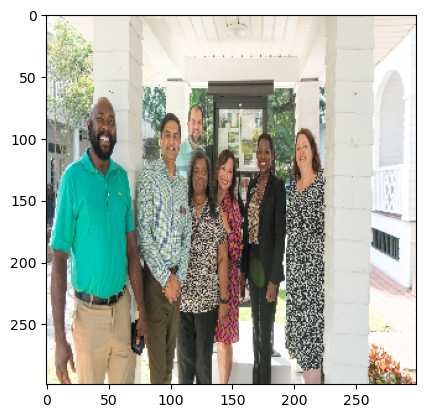

In [48]:
import tensorflow as tf
import cv2
import numpy as np

# Load the pre-trained InceptionV3 model
model = tf.keras.applications.InceptionV3(weights='imagenet')

# Load and preprocess the image
image_path = 'bh26.jpg'
img = tf.keras.preprocessing.image.load_img(image_path, target_size=(299, 299))
img_array = tf.keras.preprocessing.image.img_to_array(img)
img_array = np.expand_dims(img_array, axis=0)
img_array = tf.keras.applications.inception_v3.preprocess_input(img_array)

# Get predictions
predictions = model.predict(img_array)

# Decode predictions
decode_predictions = tf.keras.applications.inception_v3.decode_predictions(predictions)

# Print top predictions
for i, (imagenet_id, label, score) in enumerate(decode_predictions[0]):
    print(f"{i + 1}: {label} ({score:.2f})")
# Optionally, you can display the image
import matplotlib.pyplot as plt
plt.imshow(img)
plt.show()

In [30]:
import cv2

def get_image_resolution(image_path):
    # Read the image using OpenCV
    img = cv2.imread(image_path)

    if img is not None:
        # Get image width and height
        height, width, _ = img.shape
        resolution = (width, height)
        return resolution
    else:
        print("Error: Could not read the image.")
        return None

# Example usage
image_path = 'Pictures/amazon5.jpg'
resolution = get_image_resolution(image_path)

if resolution:
    print(f"Image Resolution: {resolution[0]} x {resolution[1]} pixels")


Image Resolution: 843 x 843 pixels


In [ ]:
import cv2
import numpy as np

# Load YOLOv3 model
net = cv2.dnn.readNet("yolos.weights", "yolos.cfg")
classes = []
with open("coco.names", "r") as f:
    classes = [line.strip() for line in f.readlines()]

# Load image
image = cv2.imread("amazon1.jpg")  # Replace with the path to your image
height, width, _ = image.shape

# Prepare image for YOLOv3
blob = cv2.dnn.blobFromImage(image, 0.00392, (416, 416), (0, 0, 0), True, crop=False)
net.setInput(blob)
outs = net.forward(net.getUnconnectedOutLayersNames())

# Process the results
conf_threshold = 0.5
nms_threshold = 0.4

class_ids = []
confidences = []
boxes = []

for out in outs:
    for detection in out:
        scores = detection[5:]
        class_id = np.argmax(scores)
        confidence = scores[class_id]
        if confidence > conf_threshold:
            center_x = int(detection[0] * width)
            center_y = int(detection[1] * height)
            w = int(detection[2] * width)
            h = int(detection[3] * height)

            x = int(center_x - w / 2)
            y = int(center_y - h / 2)

            class_ids.append(class_id)
            confidences.append(float(confidence))
            boxes.append([x, y, w, h])

# Apply non-maximum suppression to remove overlapping boxes
indices = cv2.dnn.NMSBoxes(boxes, confidences, conf_threshold, nms_threshold)

# Draw bounding boxes on the image
for i in indices:
    i = i[0]
    box = boxes[i]
    x, y, w, h = box
    label = str(classes[class_ids[i]])
    confidence = confidences[i]
    color = (0, 255, 0)  # Green
    cv2.rectangle(image, (x, y), (x + w, y + h), color, 2)
    cv2.putText(image, f"{label} {confidence:.2f}", (x, y - 10), cv2.FONT_HERSHEY_SIMPLEX, 0.5, color, 2)

# Display the resulting image
cv2.imshow("Object Detection", image)
cv2.waitKey(0)
cv2.destroyAllWindows()


In [ ]:
import tensorflow as tf
from tensorflow.keras.preprocessing import image
import numpy as np

# Load your pre-trained emotion detection model
model = tf.keras.models.load_model('emotion_detection_model.h5')

# Load and preprocess your image
img_path = 'Pictures/p2wmart.jpg'
img = image.load_img(img_path, target_size=(48, 48), grayscale=True)  # Adjust target size and color as needed
x = image.img_to_array(img)
x = np.expand_dims(x, axis=0)
x = x / 255.0  # Normalize pixel values if required

# Make predictions
emotion_labels = ['Angry', 'Disgust', 'Fear', 'Happy', 'Sad', 'Surprise', 'Neutral']
predictions = model.predict(x)
predicted_emotion = emotion_labels[np.argmax(predictions)]

# Display the predicted sentiment
print(f'Predicted Emotion/Sentiment: {predicted_emotion}')

In [ ]:
import torch
from torchvision import models, transforms
from PIL import Image

# Load a pre-trained AlexNet model
model = models.alexnet(pretrained=True)
model.eval()

# Preprocess and load an image
img_path = 'path_to_image.jpg'
transform = transforms.Compose([
    transforms.Resize(256),
    transforms.CenterCrop(224),
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225]),
])
img = Image.open(img_path)
img = transform(img).unsqueeze(0)

# Make predictions
with torch.no_grad():
    outputs = model(img)

_, predicted_class = outputs.max(1)
print(f"Predicted class: {predicted_class.item()}")


In [ ]:
import tensorflow as tf
from tensorflow.keras.applications import VGG16
from tensorflow.keras.applications.vgg16 import preprocess_input, decode_predictions
from tensorflow.keras.preprocessing import image

# Load the pre-trained VGG16 model
model = VGG16(weights='imagenet')

# Load and preprocess an image
img_path = 'path_to_image.jpg'
img = image.load_img(img_path, target_size=(224, 224))
x = image.img_to_array(img)
x = preprocess_input(x)
x = tf.expand_dims(x, axis=0)

# Make predictions
predictions = model.predict(x)

# Decode and print the top predictions
decoded_predictions = decode_predictions(predictions, top=5)[0]
for i, (imagenet_id, label, score) in enumerate(decoded_predictions):
    print(f"{i + 1}: {label} ({score:.2f})")


In [ ]:
import tensorflow as tf
from tensorflow.keras.applications import MobileNetV2
from tensorflow.keras.applications.mobilenet_v2 import preprocess_input, decode_predictions
from tensorflow.keras.preprocessing import image

# Load the pre-trained MobileNetV2 model
model = MobileNetV2(weights='imagenet')

# Load and preprocess an image
img_path = 'path_to_image.jpg'
img = image.load_img(img_path, target_size=(224, 224))
x = image.img_to_array(img)
x = preprocess_input(x)
x = tf.expand_dims(x, axis=0)

# Make predictions
predictions = model.predict(x)

# Decode and print the top predictions
decoded_predictions = decode_predictions(predictions, top=5)[0]
for i, (imagenet_id, label, score) in enumerate(decoded_predictions):
    print(f"{i + 1}: {label} ({score:.2f})")


In [ ]:
import tensorflow as tf
import numpy as np
from PIL import Image
from matplotlib import pyplot as plt
from deeplab import DeepLabModel

# Load DeepLabV3 model
MODEL = DeepLabModel("deeplabv3_pascal_trainval_2018_01_04.tar.gz")

# Load and preprocess the image
image_path = "C:/Users/HP/p2wmart.jpg"
image = Image.open(image_path)
resized_image = image.resize((513, 513), Image.ANTIALIAS)
input_tensor = tf.convert_to_tensor(np.array(resized_image))

# Perform semantic segmentation
output_tensor = MODEL.run(input_tensor)
segmentation_map = np.argmax(output_tensor, axis=-1)[0]

# Display the segmentation map
plt.imshow(segmentation_map)
plt.show()


In [ ]:
import torch
import torchvision
from PIL import Image
from torchvision import transforms

model = torchvision.models.detection.captioning(pretrained=True)
model.eval()

image = Image.open("path_to_your_image.jpg")
preprocess = transforms.Compose([
    transforms.Resize((224, 224)),
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225]),
])
input_tensor = preprocess(image)
input_batch = input_tensor.unsqueeze(0)

with torch.no_grad():
    output = model(input_batch)
caption = output[0]["caption"]